# Sequence of finite wells (approx for a crystal)

In [1]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])
from scipy.interpolate import interp1d
from scipy.integrate import quad

## Theory 
Suppose one has a sequence of well each spaced a distance $b$ apart
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$

$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

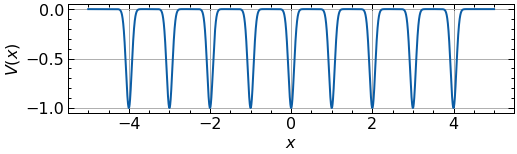

In [3]:
x=np.linspace(-5,5,10000)
y=np.sum([-np.exp(-(x-a)**2/0.01) for a in range(-4,5) ], axis=0)
plt.figure(figsize=(8,2))
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.plot(x,y)

This can be used as a model for a solid, where each well represents a nucleus or proton. If one inserts an electron into this system, what are the allowed energy eigenvalues/eigenvectors of **bound** energies? (Remember that there are only finitely many bound energies for a finite quantum well).

**LINEAR COMBINATION OF ATOMIC ORBIRTALS (LCAO) Approximation**: This model **assumes** that molecular states are a linear combination of known atomic states. We'll use the notation

$$\ket{i}_j$$

where this represents the $i$th excited state of the $j$th well. The LCAO approximation says that any state can be represented as 

$$\ket{\psi} = \sum_{j} \sum_i c_{ij}\ket{i}_j$$

where $c_ij$ are coefficients that make up the linear combination. Thus the $\ket{i}_j$ form a complete basis. Suppose we have 3 wells, each with two states (a ground and excited state). In vector notation, we can write any state as

$$\ket{\psi} = \begin{bmatrix}c_1\\ c_2\\ c_3\\ c_4\\ c_5 \\ c_6  \end{bmatrix} \begin{matrix} \to \ket{0}_0\\ \to \ket{1}_0\\ \to \ket{0}_1\\ \to \ket{1}_1\\ \to \ket{0}_2\\ \to \ket{1}_2\\ \end{matrix}$$

where the $c$'s are the component of each of the $\ket{i}_j$s of the basis:

$$\ket{\psi} = c_1\ket{0}_0 + c_2\ket{1}_0 + c_3\ket{0}_1 + c_4\ket{1}_1 + c_1\ket{0}_2 + c_1\ket{1}_2$$

The Hamiltonian $H = T+\sum_i V_i$ of the full well system can be written in the basis of these $\ket{i}_j$s where each element of the hamiltonian matrix is

$$\bra{i'}_{j'}H\ket{i}_j$$

once we have this matrix, we can solve for the eigenvalues and eigenvectors and we're done. We just need a way to get these elements. For this we use

$$H = H_j + \hat{V}_j$$

where $H_j = T+V_j$ is the Hamiltonian of a well $j$ and $\hat{V}_j=\sum_{m \neq j} V_{m}$ is the potential from all the adjacent wells. Letting $n=j-j'$ (the number of wells apart), the matrix elements are given by:

$$\begin{align*} \bra{i'}_{j'}H\ket{i}_{j} &= \bra{i'}_{j'}H_j + \hat{V}_j \ket{i}_{j} \\ &= \bra{i'}_{j'}E_i + \hat{V}_j \ket{i}_{j} \\ &= \int_{-\infty}^{\infty} \phi_{i'}^{*}(x \pm nb) \left[E_i+\hat{V}(x)\right]\phi_{i}(x) dx \end{align*}$$

We can now get all the matrix elements and solve for the eigenvalues of the Hamiltonian!

### Let'do it 

Here's a function that solves for the *bound* (energies less than zero) eigenstates of some finite square well.

In [48]:
def solve_single_well(x,V , V0):
    N=len(x)
    dx=np.diff(x)[0]
    main_diag=2*np.ones(N)/dx**2 + V(x,V0)
    off_diag=-np.ones(N-1)/dx**2
    Es, psis =eigh_tridiagonal(main_diag,off_diag, select='v', select_range=(-V0,0))
    psis=psis/np.sqrt(((psis)**2).sum(axis=0)*dx)
    return Es, psis.T

With these eigenstates/energies, we can compute the matrix elements $\bra{i'}_{j'}H\ket{i}_{j} = \int_{-\infty}^{\infty} \phi_{i'}^{*}(x \pm nb) \left[E_i+\hat{V}(x)\right]\phi_{i}(x) dx $ of the Hamiltonian and solve our system!

## Examples to Consider

1. Finite Square Well (single bound state)
* $V_0 = 1$eV
* Well Width $2a=0.35$nm
* Well spacing $b = 3 \cdot 2a$

2. Finite Square Well (two bound states)
* $V_0 = 5$eV
* Well Width $2a=0.35$nm
* Well spacing $b = 3 \cdot 2a$

3. Gaussian Well
* $V = V_0 e^{-(3x/a)^2}$ where $V_0/(\frac{\hbar^2}{2ma^2}) = 36$
* Well spacing $b = 2 \cdot 2a$



In [49]:
#Example 1 with dimensions
V0=1 #eV
hbar=6.52112e-16 #eV s
m=0.510999e6/(3e8)**2
a=0.35e-9/2
f=hbar**2/(2*m*a**2)
#DImensionless pars
V0=V0/f
b=3*2

In [36]:
'''Dimensionfull parameters'''
V0 = 5 #eV
hbar = 6.582112e-16 #eV s
m = 0.510999e6 / (3e8)**2 #eV s^2 / m^2
a = 0.35e-9 / 2 # m 
f = hbar**2 / (2*m*a**2)
'''Dimensionless parameters'''
V0 = V0 / f
b = 3 * 2

In [37]:
'''Dimensionless parameters'''
V0 = 36
b = 2 * 2
f = 1 # correction factor is 1 because we'll just look at dimensionless energy eigenvalues

Get the potential for the particular example:

In [50]:
example = 1
N = 100000
x = np.linspace(-15,15,N)
if example==1 or example==2:
    def V(x, V0):
        return -V0*np.array((x>=-1)*(x<=1), dtype=float)
elif example==3:
    def V(x,V0):
        return -V0*np.exp(-(3*x)**2)

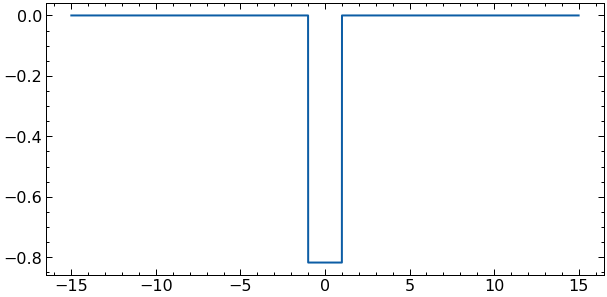

In [51]:
plt.figure(figsize=(10,5))
plt.plot(x,V(x,V0))

In [52]:
Es, psis=solve_single_well(x,V,V0)   #dimensionless
f*Es                                 #dimensionfull

array([-0.40978185])

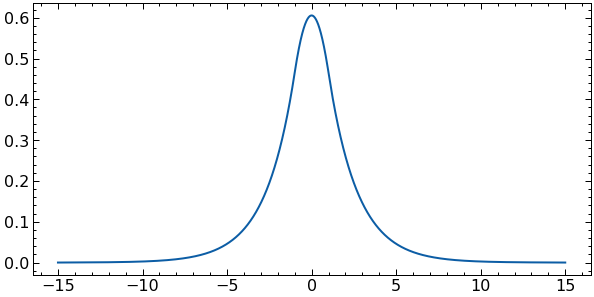

In [53]:
plt.figure(figsize=(10,5))
[plt.plot(x,psi) for psi in psis]  #in this case there is only one psi
plt.show()


IN order to solve our integral we need an interpolated function that can compute the wavefunctions at any x

In [54]:
psis

array([[4.88166034e-08, 9.76332083e-08, 1.46449816e-07, ...,
        1.46449816e-07, 9.76332083e-08, 4.88166034e-08]])

In [55]:
#be false means that outside the region of interpolation it will not give us an error if we put
#an x outside that region 
psis_f=[interp1d(x, psi, bounds_error=False, fill_value=(0,0)) for psi in psis] 

psis_f[0](18)    # [0] stands for the ground state

array(0.)

Definine $\hat{V}$ the potential from all the wells, excepted the cetered one at $x=0$

In [56]:
def Vp_f(x, b, V0):
    return V((x+b/2)%b-b/2,V0) - V(x,V0)  # First part gives us the periodic structure


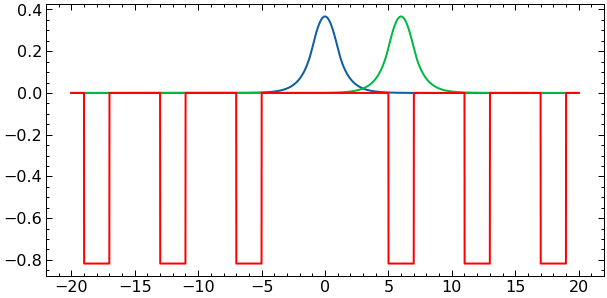

In [58]:
x_large = np.linspace(-20,20,10000)
plt.figure(figsize=(10,5))
plt.plot(x_large,psis_f[0](x_large)**2)
plt.plot(x_large, psis_f[0](x_large - b)**2)

plt.plot(x_large, Vp_f(x_large, b , V0), color='red')
plt.show()

Now we have to evaluate that integral

In [59]:
def compute_integral(psis_f, Es, i1, i2, b, V0, n):
    return quad(lambda x: psis_f[i1](x)*psis_f[i2](x-n*b)*(Es[i1]+ Vp_f(x, b, V0)),
                -20,20, points=[n*b for n in range(-6,6)], limit=10000)[0]

In [60]:
f*compute_integral(psis_f, Es,0,0,b=6,V0=V0, n=1)

-0.09488197561743208

### Hamiltonian Matrix


In [61]:
N_wells= 20
N_states= len(Es)
H = np.zeros((N_wells*N_states,N_wells*N_states))
H

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [62]:
psis_f

In [ ]:
#Fill off the diagonals
psis_tot=N_wells * psis_f. #list of inter functions
Es-tot=N_wells* list(Es)
for i1 in range(H.shape[0]):
    for i2 in range(i1,H.shape[0]):
        well1_idx = i1//N_states
        well2_idx = i2//N_states
        H[i1][i2] = compute_integral(psist_tot, Es_tot, i1, i2,b=b.V0=V0, n=well2_idx-well1_idx) )

[-0.33511353225685747]